In [ ]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv('matches.csv')
matches.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Titans,Super Kings,Super Kings,5 wickets,Ahmedabad,"May 28-29, 2023",Twenty20
1,Titans,Mumbai,Titans,62 runs,Ahmedabad,"May 26, 2023",Twenty20
2,Super Giants,Mumbai,Mumbai,81 runs,Chennai,"May 24, 2023",Twenty20
3,Super Kings,Titans,Super Kings,15 runs,Chennai,"May 23, 2023",Twenty20
4,RCB,Titans,Titans,6 wickets,Bengaluru,"May 21, 2023",Twenty20


In [3]:
batting = pd.read_csv('all-batting-record.csv')
batting.head()

,title,BATTING,dismissed,R,B,M,4s,6s,SR
0,Gujarat Titans VS Chennai Super Kings,Wriddhiman Saha †,c †Dhoni b Chahar,54,39,63,5,1,138.46
1,Gujarat Titans VS Chennai Super Kings,Shubman Gill,st †Dhoni b Jadeja,39,20,34,7,0,195.00
2,Gujarat Titans VS Chennai Super Kings,Sai Sudharsan,lbw b Pathirana,96,47,58,8,6,204.25
3,Gujarat Titans VS Chennai Super Kings,Hardik Pandya (c),not out,21,12,32,0,2,175.00
4,Gujarat Titans VS Chennai Super Kings,Rashid Khan,c Gaikwad b Pathirana,0,2,2,0,0,0.00


In [4]:
bowling = pd.read_csv('all-bowling-record.csv')
bowling.head()

,title,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
0,Gujarat Titans VS Chennai Super Kings,Deepak Chahar,4.0,0,38,1,9.5,5,3,1,0,0
1,Gujarat Titans VS Chennai Super Kings,Tushar Deshpande,4.0,0,56,0,14.0,4,7,3,0,0
2,Gujarat Titans VS Chennai Super Kings,Maheesh Theekshana,4.0,0,36,0,9.0,8,3,2,0,0
3,Gujarat Titans VS Chennai Super Kings,Ravindra Jadeja,4.0,0,38,1,9.5,3,3,1,0,0
4,Gujarat Titans VS Chennai Super Kings,Matheesha Pathirana,4.0,0,44,2,11.0,7,4,2,2,0


<Axes: title={'center': 'Points Table'}, xlabel='Teams', ylabel='Matches Won'>

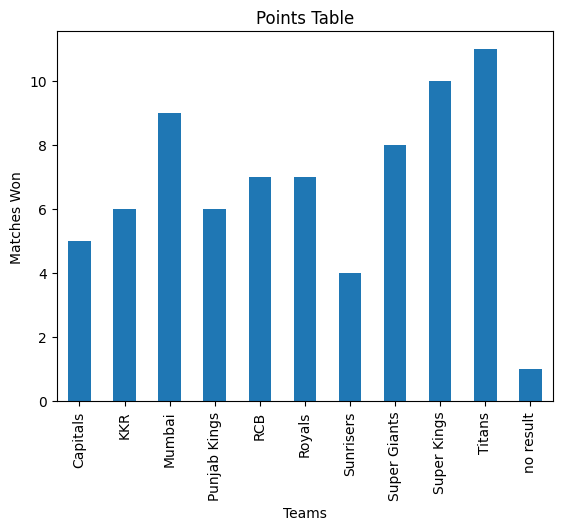

In [5]:
# which team won the most number of matches?

won = matches.groupby('Winner').count()['Scorecard']
won.plot(kind='bar',title='Points Table',xlabel='Teams',ylabel='Matches Won')

#from this it is clear that Titans won the most matches while SRH won the least no. of matches

In [6]:
# which player scored the most amt of runs (Orange Cap Holder)?

high_scores = batting.groupby('BATTING').sum()
high_scores = high_scores.sort_values('R',ascending=False)
print("ORANGE CAP HOLDER \n")
print(high_scores['R'].head(1)) #Shubman Gill will get the Orange Cap!
print("\n")

ORANGE CAP HOLDER 

BATTING
Shubman Gill     890
Name: R, dtype: int64




In [7]:
# Power Hitters?
# for this first calculated the avg of all players (how many runs have they scored in their balls played)
# this would help as if the no. of balls played is less, the avg will be more
# to improve the accuracy, i added the 6s count
# because power hitters usually hit more no. of 6s

print("POWER HITTERS \n")
high_scores['avg'] = (high_scores['R']/high_scores['B']) + high_scores['6s']
high_scores = high_scores.sort_values('avg',ascending=False).head(10)
print(high_scores['avg'])
print("\n")

POWER HITTERS 

BATTING
Shivam Dube           36.583333
Shubman Gill          34.578014
Glenn Maxwell         32.834862
Ruturaj Gaikwad       31.475000
Rinku Singh           30.495268
Faf du Plessis (c)    28.520107
Marcus Stoinis        28.500000
Yashasvi Jaiswal      27.636126
Suryakumar Yadav      26.818770
Heinrich Klaasen †    26.770751
Name: avg, dtype: float64




In [8]:
# Most 100s

print("Most Hundreds in IPL 2023 \n")

''' method 1:

hundred = {}
for i,r in batting.iterrows():
    if (r['R']>=100):
        if (r['BATTING'] not in hundred):
            hundred[r['BATTING']]=1
        else:
            hundred[r['BATTING']]+=1
print(hundred)
print("\n")      '''

# method 2:
print(batting[batting['R']>=100].groupby('BATTING').count().sort_values('R',ascending=False)['R'])

Most Hundreds in IPL 2023 

BATTING
Shubman Gill          3
Virat Kohli           2
Cameron Green         1
Harry Brook           1
Heinrich Klaasen †    1
Prabhsimran Singh     1
Suryakumar Yadav      1
Venkatesh Iyer        1
Yashasvi Jaiswal      1
Name: R, dtype: int64


In [9]:
# Fastest 100!

print("Fastest 100! \n")

''' method 1:

fastest={}
for i,r in batting.iterrows():
    if (r['R']>=100):
        if (r['BATTING'] in hundred):
            if (fastest[r['BATTING']]<r['B']):
                fastest[r['BATTING']]=r['B']
        else:
            fastest[r['BATTING']]=r['B']
fastest '''

# method 2:
print(batting[batting['R']>=100].sort_values('B')[['BATTING','R','B']])

Fastest 100! 

                BATTING    R   B
88       Cameron Green   100  47
261   Suryakumar Yadav   103  49
142  Heinrich Klaasen †  104  51
808     Venkatesh Iyer   104  51
74        Shubman Gill   104  52
859        Harry Brook   100  55
176       Shubman Gill   101  58
13        Shubman Gill   129  60
66         Virat Kohli   101  61
482   Yashasvi Jaiswal   124  62
145        Virat Kohli   100  63
227  Prabhsimran Singh   103  65


In [10]:
# Which team won at home ground the most?

ground = {'Titans':'Ahmedabad','Super Kings':'Chennai','Mumbai':'Wankhade','Super Giants':'Lucknow','RCB':'Bengaluru','KKR':'Eden Gardens','Punjab Kings':'Mohali','Royals':'Jaipur','Capitals':'Delhi','Sunrisers':'Hyderabad'}
won_at_home={}
for i,r in matches.iterrows():
    if (r['Ground']==ground[r['Team 1']] and r['Winner']==r['Team 1']):
        if (r['Team 1'] not in won_at_home):
            won_at_home[r['Team 1']]=1
        else:
            won_at_home[r['Team 1']]+=1
    elif (r['Ground']==ground[r['Team 2']] and r['Winner']==r['Team 2']):
        if (r['Team 2'] not in won_at_home):
            won_at_home[r['Team 2']]=1
        else:
            won_at_home[r['Team 2']]+=1
won_at_home  #this might be difficult because sadly Punjab Kings had 2 home grounds

{'Titans': 5,
 'Super Kings': 5,
 'Super Giants': 3,
 'KKR': 2,
 'Capitals': 2,
 'Royals': 1,
 'RCB': 3,
 'Sunrisers': 1,
 'Punjab Kings': 1}

In [11]:
# which bowler took the most wickets? (Purple Cap)

bowling.groupby('BOWLING').sum().sort_values('W',ascending=False)['W'].head(10)

BOWLING
Mohammed Shami         28
Rashid Khan            27
Mohit Sharma           27
Piyush Chawla          22
Yuzvendra Chahal       21
Tushar Deshpande       21
Varun Chakravarthy     20
Ravindra Jadeja        20
Matheesha Pathirana    19
Mohammed Siraj         19
Name: W, dtype: int64